In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hh = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
hh.shape

(299, 13)

In [5]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
hh.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
# setupo my X & y
X = hh.drop('DEATH_EVENT',axis=1).values
y = hh['DEATH_EVENT'].values

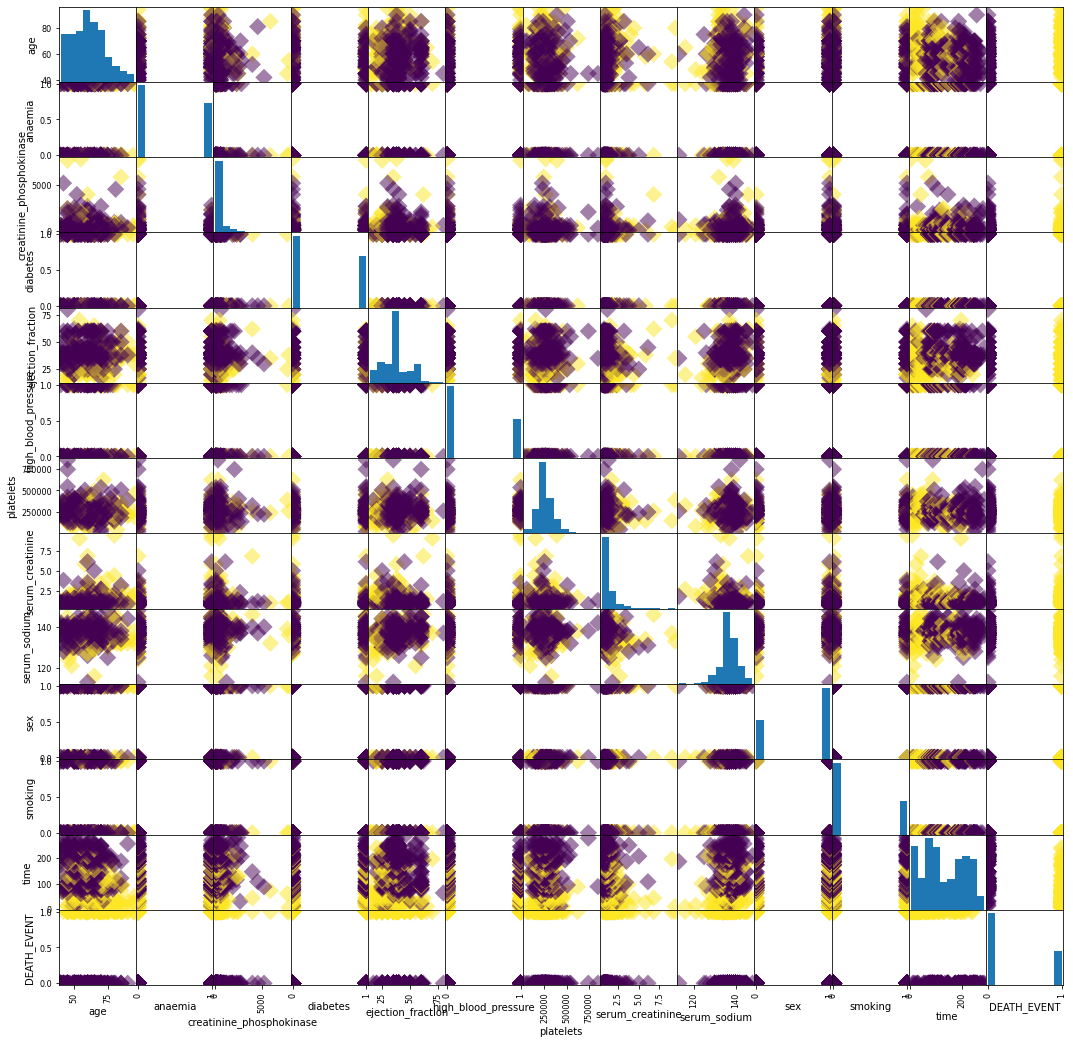

In [9]:
_ = pd.plotting.scatter_matrix(hh,c=y,figsize=[18,18],s=150,marker='D')
plt.savefig("scatter_matrix_heart.png")

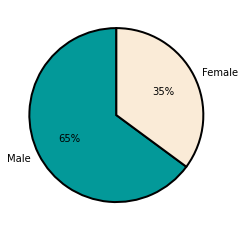

In [26]:
# pie of proportion of men v wemen in the data
plt.pie(hh["sex"].value_counts(),labels = ["Male", "Female"],colors = ["#039999", "#faebd7"],
        wedgeprops={'edgecolor':'black', 'linewidth': 2},autopct = lambda y: str(round(y))+"%",startangle=90);
plt.savefig("pie_male_female.png")

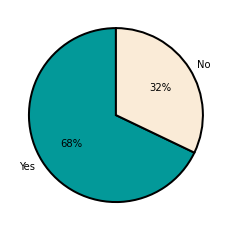

In [28]:
# pie of proportion of smokers v non smokers
plt.pie(hh["smoking"].value_counts(),
        labels = ["Yes", "No"],
        colors = ["#039999", "#faebd7"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);
plt.savefig("pie_smokers.png")

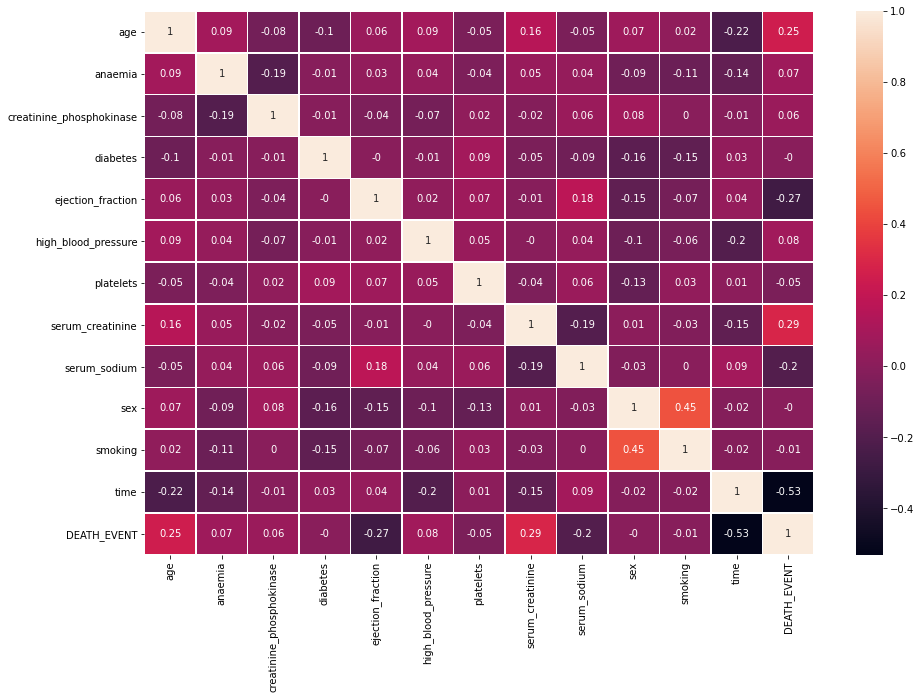

In [29]:

plt.figure(figsize=(15,10))
correlat_matrix = hh.corr().round(2)
sns.heatmap(data=correlat_matrix, annot=True, linewidths=.5)
plt.savefig("heatmap_heart.png")

In [15]:
# pull out the features with the most effect on the target variable Death
feature_correlation_matrix = hh.corr()
feature_correlation_matrix[abs(feature_correlation_matrix['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

# I will use these features im the model

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [16]:
# I will use these features in the model
X = hh[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'platelets']]
y = hh[['DEATH_EVENT']]

In [21]:
# import classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# set the seed for the random generator
SEED = 1
# split the data into test train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=SEED)

# Instantiate a DecisionTree 'dt_heart'
dt_heart = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)
# Instantiate ensemble method  BaggingClassifier 'bc_heart' or bootstrap aggregation
bc_heart = BaggingClassifier(base_estimator=dt_heart, n_estimators=300, n_jobs=-1)
# Fit 'bc_heart' to training set , used ravel() to round up the values
bc_heart.fit(X_train, y_train.values.ravel())
# y_predict test set labels
y_pred = bcheart.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy}')

Accuracy of Bagging Classifier: 0.8333333333333334


In [22]:
# use adaBoost to boost to increase the accurecy from 0.83 to 0.87
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
adb_clf = AdaBoostClassifier(base_estimator=bc, n_estimators=100)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_train, y_train.values.ravel())
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'Accuracy of adaBoost: {adb_clf_roc_auc_score}')

Accuracy of adaBoost: 0.8705483323911815
